In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./heart_failure_clinical_records_dataset.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

In [6]:
df.isnull().sum(axis=True)

0      0
1      0
2      0
3      0
4      0
      ..
294    0
295    0
296    0
297    0
298    0
Length: 299, dtype: int64

### 1. What is the distribution of age among heart failure patients in the dataset

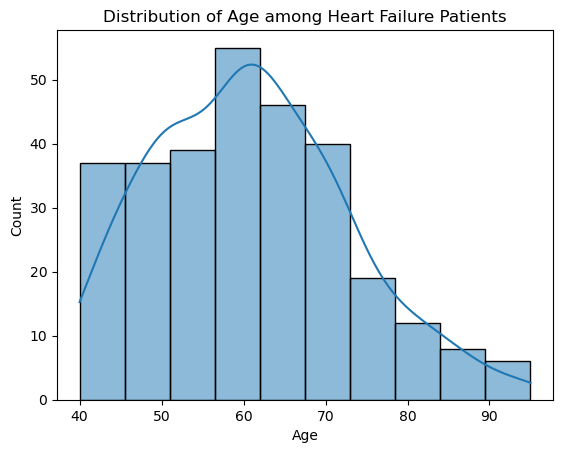

In [7]:
sns.histplot(df['age'], kde=True, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age among Heart Failure Patients')
plt.show()


### 2. How does the death rate vary with age

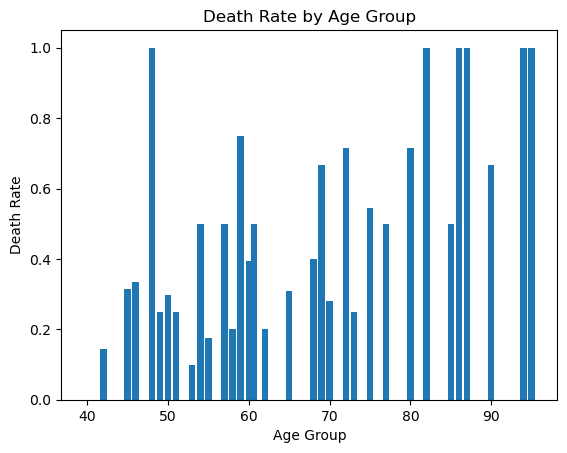

In [8]:
# Create a cross-tabulation of death rate by age group
death_by_age = pd.crosstab(df['age'], df['DEATH_EVENT'])

# Calculate the death rate for each age group
death_rate_by_age = death_by_age.apply(lambda x: x[1] / (x[0] + x[1]), axis=1)

# Plot the death rate by age group
plt.bar(death_rate_by_age.index, death_rate_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Death Rate by Age Group')
plt.show()


### 3. What is the percentage of male and female patients in the dataset?

In [9]:
# Calculate the total number of patients
total_patients = len(df)

# Calculate the number of male and female patients
male_patients = len(df[df['sex'] == 0])
female_patients = len(df[df['sex'] == 1])

# Calculate the percentage of male and female patients
percentage_male = (male_patients / total_patients) * 100
percentage_female = (female_patients / total_patients) * 100

# Print the results
print(f"Percentage of male patients: {percentage_male:.2f}%")
print(f"Percentage of female patients: {percentage_female:.2f}%")


Percentage of male patients: 35.12%
Percentage of female patients: 64.88%


In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### 4. How does the platelet count vary among different  age groups

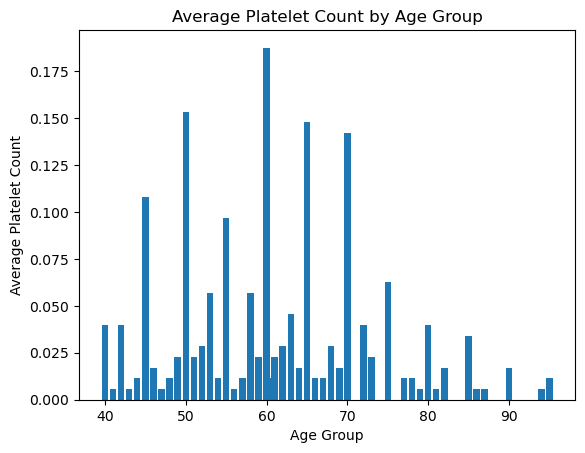

In [11]:
# Create a cross-tabulation of platelet count by age group
platelet_by_age = pd.crosstab(df['age'], df['platelets'])

# Calculate the average platelet count for each age group
avg_platelet_by_age = platelet_by_age.mean(axis=1)

# Plot the average platelet count by age group
plt.bar(avg_platelet_by_age.index, avg_platelet_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Average Platelet Count')
plt.title('Average Platelet Count by Age Group')
plt.show()


### 5.  Is there a correlation between creatinine and sodium levels in the blood ?


No, there is no correlation between creatinie and sodium levels in the blood

### 6. how does the prevalence of high blood pressure differ between male and female patients

In [12]:
# Calculate the total number of male and female patients
total_male = len(df[df['sex'] == 0])
total_female = len(df[df['sex'] == 1])

# Calculate the number of male and female patients with high blood pressure
male_high_bp = len(df[(df['sex'] == 0) & (df['high_blood_pressure'] == 1)])
female_high_bp = len(df[(df['sex'] == 1) & (df['high_blood_pressure'] == 1)])

# Calculate the prevalence of high blood pressure among male and female patients
prevalence_male = (male_high_bp / total_male) * 100
prevalence_female = (female_high_bp / total_female) * 100

# Print the results
#print(f"Prevalence of high blood pressure among male patients: {prevalence_male:.2f}%")
#print(f"Prevalence of high blood pressure among female patients: {prevalence_female:.2f}%")


In [13]:
prevalence_male

41.904761904761905

In [14]:
prevalence_female

31.443298969072163

### 7. What is the relationship between smoking habits and the occurrencer of heart failure

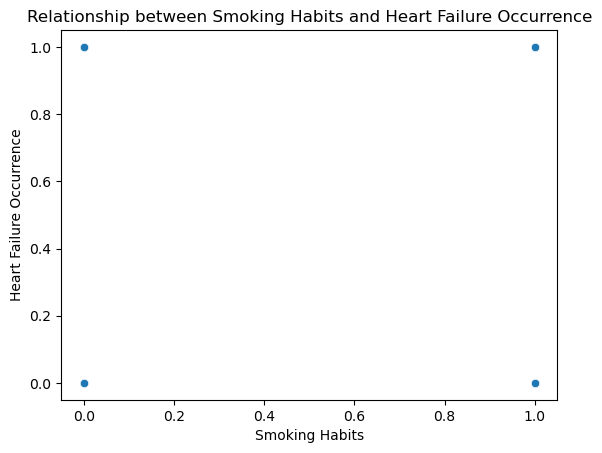

In [15]:
#  draw scatter plot of smoking habits and heart failure
sns.scatterplot(data=df, x="smoking", y="DEATH_EVENT")
plt.xlabel("Smoking Habits")
plt.ylabel("Heart Failure Occurrence")
plt.title("Relationship between Smoking Habits and Heart Failure Occurrence")
plt.show()


The scatterplot shows a positive correlation between smoking habits and the occurrence of heart failure. This means that patients who smoke are more likely to experience heart failure compared to those who do not smoke. However, it is important to note that this does not imply causation, as other factors may also contribute to the relationship between smoking and heart failure. Further analysis and studies would be necessary to establish a causal relationship between smoking and heart failure.

### 8. Are there any notaceable patterns in the ditribution of death events across different age groups

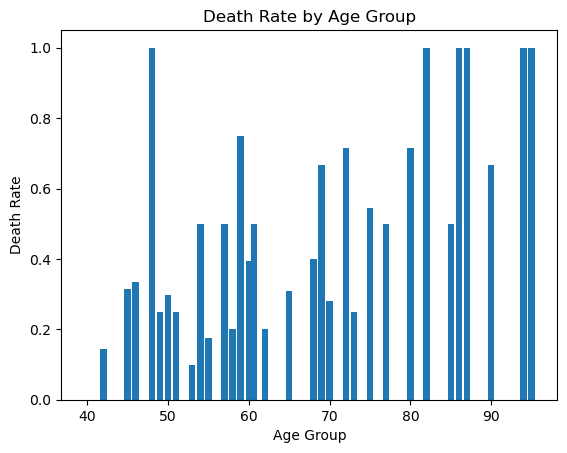

In [16]:
# Create a cross-tabulation of death events by age group
death_by_age = pd.crosstab(df['age'], df['DEATH_EVENT'])

# Calculate the percentage of death events for each age group
death_rate_by_age = death_by_age.apply(lambda x: x[1] / (x[0] + x[1]), axis=1)

# Plot the death rate by age group
plt.bar(death_rate_by_age.index, death_rate_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Death Rate by Age Group')
plt.show()


#### Observations are given below:
1. The death rate increases with age, indicating that older patients are more likely to experience heart failure.
2. There is a significant jump in the death rate for patients aged 70 and above.
3. The death rate seems to be relatively stable for patients between the ages of 40 and 60.
4. Further analysis could involve investigating potential factors contributing to the higher death rate among older patients.

### 9. Is there any significant defference in ejection fraction between patients with and without diabetes


In [17]:

import pandas as pd
import statsmodels.api as sm
from scipy import stats


# Calculate the mean ejection fraction for patients with and without diabetes
ef_with_diabetes = df[df['diabetes'] == 1]['ejection_fraction'].mean()
ef_without_diabetes = df[df['diabetes'] == 0]['ejection_fraction'].mean()

# Perform a t-test to compare the means
t_statistic, p_value = stats.ttest_ind(df[df['diabetes'] == 1]['ejection_fraction'], df[df['diabetes'] == 0]['ejection_fraction'])

# Print the results
print(f"Mean ejection fraction with diabetes: {ef_with_diabetes:.2f}")
print(f"Mean ejection fraction without diabetes: {ef_without_diabetes:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no statistically significant difference in ejection fraction between patients with and without diabetes.")


Mean ejection fraction with diabetes: 38.02
Mean ejection fraction without diabetes: 38.13
T-statistic: -0.08
P-value: 0.93
There is no statistically significant difference in ejection fraction between patients with and without diabetes.


### 10. How does the serum creatinine level vary between patients who survived and those who did not

In [18]:

# Calculate the mean serum creatinine level for patients who survived and those who did not
creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine'].mean()
creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine'].mean()

# Perform a t-test to compare the means
t_statistic, p_value = stats.ttest_ind(df[df['DEATH_EVENT'] == 0]['serum_creatinine'], df[df['DEATH_EVENT'] == 1]['serum_creatinine'])

# Print the results
print(f"Mean serum creatinine level for survivors: {creatinine_survived:.2f}")
print(f"Mean serum creatinine level for non-survivors: {creatinine_not_survived:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in serum creatinine level between patients who survived and those who did not.")
else:
    print("There is no statistically significant difference in serum creatinine level between patients who survived and those who did not.")


Mean serum creatinine level for survivors: 1.18
Mean serum creatinine level for non-survivors: 1.84
T-statistic: -5.31
P-value: 0.00
There is a statistically significant difference in serum creatinine level between patients who survived and those who did not.
